**CS420 ASSIGNMENT 2 SOLUTION (CODE)**

`NAME: KANG CHIN SHEN (G1)`

`MATRIC. NO: 01412921`

**Question 4**

Part (a)

---



In [ ]:
# Import packages
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
# Create the Frozen Lake Environment
env = gym.make("FrozenLake8x8-v0")
env.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [ ]:
# Determine state space
action_size = env.action_space.n
print("Action size: ", action_size)

# Determine action space
state_size = env.observation_space.n
print("State size: ", state_size)

# Create Q-table
qtable = np.zeros((state_size, action_size))
qtable_history = []
score_history = []
print("Table shape: ", qtable.shape)

Action size:  4
State size:  64
Table shape:  (64, 4)


In [ ]:
# Hyperparameters

gamma = 0.9                   # Discount factor 
total_episodes = 250000       # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 400               # Max steps per episode = action_size * state_size * 2

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001           # Minimum exploration probability 
decay_rate = 0.00005          # Exponential decay rate for exploration prob

In [ ]:
# List of rewards
rewards = []

# Run the Q-Learning with pre-defined number of episodes 
for episode in range(total_episodes):

    # Reset the environment in a new episode
    state = env.reset()

    step = 0

    done = False

    total_rewards = 0

    # In a episode (Start to Finish)
    for step in range(max_steps):

        # Choose an action, a in the current world state
        # Get a randomized number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        # If this number > greater than epsilon : exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice : exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Add the reward to total_rewards of this episode
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (we're dead) : finish episode
        if done == True: 
            break
        
    # Reduce epsilon after each iteration : exploitation over exploration
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 


    # Append the reward of this eposide to reward list
    rewards.append(total_rewards)

    # Increase the episode_count
    episode_count = episode + 1

Part (b)

---

In [ ]:
# Show the total accumulated reward for each episode
print(rewards)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
# Check the output
print ("Reward over time: " +  str(sum(rewards)/total_episodes))
print(qtable)


Reward over time: 0.387792
[[5.99636804e-04 1.16550677e-03 9.49666621e-05 9.39206068e-05]
 [1.30254479e-04 4.25117930e-04 3.51256867e-03 7.04871109e-04]
 [4.15510318e-04 2.10967120e-03 2.23571161e-03 4.11638518e-04]
 [6.93021806e-04 4.16220678e-04 4.80596572e-04 2.09850742e-02]
 [5.00499004e-04 1.53059675e-03 2.83603617e-02 4.84835421e-04]
 [6.12964805e-04 2.00001182e-03 3.00457194e-02 6.49413264e-04]
 [7.32238416e-04 2.20403637e-02 3.10665494e-02 6.86970836e-04]
 [7.74875102e-04 7.50791781e-04 4.47536178e-02 7.65230999e-04]
 [8.42095554e-05 7.52961287e-05 1.52723729e-03 6.27012627e-04]
 [2.94243056e-04 2.38894736e-04 7.79498849e-05 1.74249023e-03]
 [1.68104386e-04 9.69336620e-05 3.41276604e-04 3.00234096e-03]
 [1.83309685e-05 4.20756106e-05 9.86200798e-06 6.15657295e-03]
 [6.00087722e-03 3.84243421e-04 3.45712352e-04 1.58126795e-03]
 [6.86124598e-04 4.46863511e-03 2.82358329e-03 1.17666532e-02]
 [2.44207139e-03 5.95488056e-03 4.36504012e-02 7.45656748e-04]
 [1.12749555e-02 3.56479292e

In [ ]:
count = 0
reward_sum = 0
avg_rewards = []

for val in rewards:
    reward_sum += val
    if count % 100 == 0:
        avg_rewards.append(reward_sum/100)
        reward_sum = 0
    count += 1

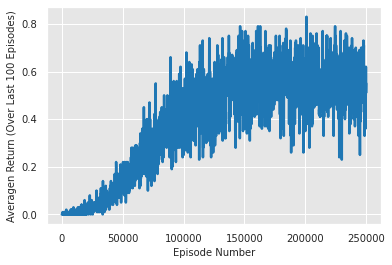

In [ ]:
font = {'size'   : 10}
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.xlabel('Episode Number', **font)
plt.ylabel('Averagen Return (Over Last 100 Episodes)', **font)
plt.plot(list(range(1,250000+1,100)), avg_rewards)

Part (c) 

---

In [ ]:
# Create a function for Q-learning purpose to test on different learning rate
def q_learning (#Required parameter
                learning_rate,
                gamma = 0.9, 
                total_episodes = 250000,
                max_steps = 400,
                epsilon = 1.0,
                max_epsilon = 1.0,
                min_epsilon = 0.001,
                decay_rate = 0.00005):
    
    # List of rewards
    rewards = []

    # Run the Q-Learning with pre-defined number of episodes 
    for episode in range(total_episodes):

        # Reset the environment in a new episode
        state = env.reset()

        step = 0

        done = False

        total_rewards = 0

        # In a episode (Start to Finish)
        for step in range(max_steps):

            # Choose an action, a in the current world state
            # Get a randomized number
            exp_exp_tradeoff = random.uniform(0, 1)
            
            # If this number > greater than epsilon : exploitation (taking the biggest Q value for this state)
            if exp_exp_tradeoff > epsilon:
                action = np.argmax(qtable[state,:])

            # Else doing a random choice : exploration
            else:
                action = env.action_space.sample()

            # Take the action (a) and observe the outcome state(s') and reward (r)
            new_state, reward, done, info = env.step(action)

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
            
            # Add the reward to total_rewards of this episode
            total_rewards += reward
            
            # Our new state is state
            state = new_state
            
            # If done (we're dead) : finish episode
            if done == True: 
                break
            
        # Reduce epsilon after each iteration : exploitation over exploration
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 


        # Append the reward of this eposide to reward list
        rewards.append(total_rewards)

        # Increase the episode_count
        episode_count = episode + 1
    return rewards

In [ ]:
def plot_results(x, y):
    plt.figure(figsize = (20,8))
    sn.set_style("darkgrid", {"axes.facecolor": ".9"})
    sn.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sn.lineplot(x, y, markers = "o")

**Graph of Average Reward VS Learning Rate**

0.1: 0.502172
0.18888888888888888: 0.464696
0.2777777777777778: 0.44942
0.3666666666666667: 0.424676
0.4555555555555556: 0.41144
0.5444444444444445: 0.406696
0.6333333333333333: 0.398948
0.7222222222222222: 0.393928
0.8111111111111111: 0.400544
0.9: 0.403064


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


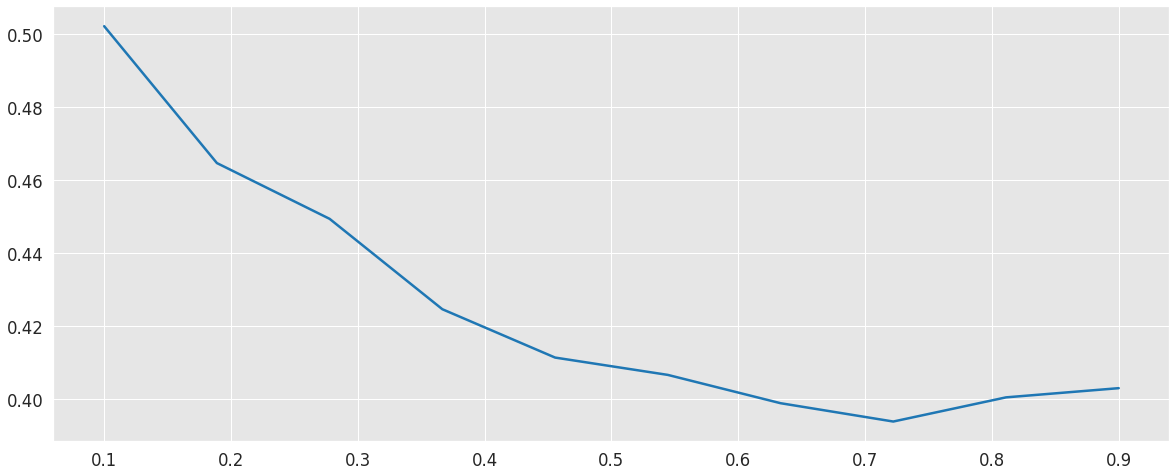

In [ ]:
# Set learning rate to values in [0.1, 0.9] 
learning_rates = np.linspace(0.1, 0.9, 10)
test_rewards = []
for learning_rate in learning_rates:
    rewards = q_learning(learning_rate)
    test_rewards.append(sum(rewards)/total_episodes)
    print(str(learning_rate) + ": " + str(sum(rewards)/total_episodes))
# Plot the 
plot_results(learning_rates, test_rewards)

**Question 5**

## (a) Load the dataset

In [ ]:
import nltk

# import the stop words
nltk.download('stopwords')
from nltk.corpus import stopwords

# import the reuters dataset
nltk.download('reuters')
from nltk.corpus import reuters

file_loc = '/root/nltk_data/corpora/reuters.zip'
from zipfile import ZipFile
with ZipFile(file_loc, 'r') as z:
    z.extractall('/root/nltk_data/corpora/')

import numpy as np
from gensim.models import word2vec

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...


In [ ]:
def load_data(category="money-fx"):

    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files/documents
    """

    files = reuters.fileids(category)

    list_words = []

    ### iterate over all documents/files from the reuters dataset
    for f in files:
        words = []

        ### iterate over all words of a document/file
        for w in list(reuters.words(f)):

            ## TODO: remove the stop words, convert a word (w) to the lowercase, and append to the list

            # (1) Convert w to lowercase and assign it to word
            word = w.lower()

            # (2) If the word is not a stopword, append it to list_words
            if word not in stopwords.words('english'):
                words.append(word)

        list_words.append(words)

    return list_words

# check a few samples of reuters corpus
reuters_corpus = load_data()
print(reuters_corpus[:3])

[['bundesbank', 'allocates', '6', '.', '1', 'billion', 'marks', 'tender', 'bundesbank', 'accepted', 'bids', '6', '.', '1', 'billion', 'marks', 'today', "'", 'tender', '28', '-', 'day', 'securities', 'repurchase', 'pact', 'fixed', 'rate', '3', '.', '80', 'pct', ',', 'central', 'bank', 'spokesman', 'said', '.', 'banks', ',', 'bid', 'total', '12', '.', '2', 'billion', 'marks', 'liquidity', ',', 'credited', 'funds', 'allocated', 'today', 'must', 'buy', 'back', 'securities', 'pledged', 'may', '6', '.', '14', '.', '9', 'billion', 'marks', 'drain', 'market', 'today', 'earlier', 'pact', 'expires', ',', 'bundesbank', 'effectively', 'withdrawing', 'net', '8', '.', '1', 'billion', 'marks', 'market', 'today', "'", 'allocation', '.', 'bundesbank', 'spokesman', 'said', 'answer', 'enquiries', 'withdrawal', 'funds', 'reflect', 'tightening', 'credit', 'policy', ',', 'seen', 'context', 'plentiful', 'liquidity', 'banking', 'system', '.', 'banks', 'held', 'average', '59', '.', '3', 'billion', 'marks', 'bu

In [ ]:
# Test
print(type(reuters_corpus))
print(type(reuters_corpus[0]))
print(type(reuters_corpus[0][0]))

print(reuters_corpus[0][0])

<class 'list'>
<class 'list'>
<class 'str'>
bundesbank


## (b) Create co-occurrence matrix

In [ ]:
from nltk.corpus.reader.wordnet import lin_similarity
def distinct_words(corpus):

    """ get a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): list of distinct words across the corpus, sorted (using python 'sorted' function)
            num_corpus_words (integer): number of distinct words across the corpus
    """

    corpus_words = []
    num_corpus_words = -1

    # (1) Create a list of distinct words in the corpus, sorted using 'sorted' function
    for document in corpus:
        for word in document:
            corpus_words.append(word)
 
    corpus_words = list(dict.fromkeys(corpus_words))
    corpus_words = sorted(corpus_words)

    # (2) Find the number of distinct words across the corpus
    num_corpus_words = len(corpus_words)

    return corpus_words, num_corpus_words

words, num_words = distinct_words(reuters_corpus)
print('words    (unique words): ', words)
print('num_words(unique words): ', num_words)

words    (unique words):  ['"', '"(', '",', '".', '&', "'", '\',"', '(', ')', '),', '),"', ').', ')."', ',', ',"', ',\'"', '-', '--', '---', '----', '.', '."', ".'", '.\'"', '.(', '.)', '.,', '.-', '..', '...', '....', '...^', '.?', '/', '0', '00', '000', '0000', '002', '003', '006913', '006916', '007050', '007100', '007150', '007200', '01', '0100', '02', '020', '023', '026', '03', '04', '05', '050', '055', '058', '059', '06', '060', '0615', '0635', '0650', '07', '0700', '0730', '075', '08', '080', '0800', '081', '0830', '085', '086', '087', '09', '0900', '09425', '0950', '096', '0speculation', '1', '10', '100', '1000', '102', '1027', '103', '1030', '104', '105', '106', '109', '11', '110', '1100', '111', '112', '113', '114', '115', '117', '118', '119', '11th', '12', '120', '1200', '1230', '125', '129', '13', '130', '1300', '131', '133', '134', '135', '136', '137', '138', '139', '14', '140', '1400', '141', '142', '143', '1430', '144', '145', '146', '147', '148', '149', '14th', '15', '15

In [ ]:
def compute_co_occurrence_matrix(corpus, window_size=7):
  
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 7).    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (numpy matrix of shape = [number of corpus words x number of corpus words]): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2Ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """

    # (1) Create numpy matrix of shape = [number of corpus words x number of corpus words]
    M = np.array([[0 for i in range(num_words)] for i in range (num_words)])

    # (2) word2Ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    word2Ind = {}
    idx = 0
    for str in words:
        word2Ind[str] = idx
        idx += 1

    # (3) Compute the co-occurence matrix of word counts 
    #     Ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function
    for document in corpus:
        for i in range(len(document)):
            for left_pointer in range(i-1, i-1-window_size, -1):
                if left_pointer < 0:
                    break
                M[word2Ind[document[i]]][word2Ind[document[left_pointer]]] += 1

            
            for right_pointer in range(i+1, i+1+window_size, 1):
                if right_pointer > (len(document) - 1):
                    break
                M[word2Ind[document[i]]][word2Ind[document[right_pointer]]] += 1


    return M, word2Ind

M, word2Ind = compute_co_occurrence_matrix(reuters_corpus)

In [ ]:
#Check the dimension of Co-occurence Matrix
print(len(M[0]))
print(len(M))
print(M)

7157
7157
[[240   0   1 ...   0   0   1]
 [  0   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  1   0   0 ...   0   0   0]]


## (c) SVD

In [ ]:
# -----------------------------
# Run SVD
# Note: This may take several minutes
# ------------------------------

# Perform SVD using 
la = np.linalg

# Extract the first 75 components with highest variance
U, s, Vh = la.svd(M, full_matrices=False)

# Create an array of word embeddings (size of 75)
word_embedding_75dim = U[:,:75]

In [ ]:
# Check dimension of word_embedding_75dim
print(len(word_embedding_75dim))
print(len(word_embedding_75dim[0]))

7157
75


In [ ]:
# Check the entries in word_embedding_75dim
print(word_embedding_75dim[0])

[-0.09452258 -0.07720011 -0.12735456  0.05468409 -0.07876138 -0.04031832
 -0.22225215  0.09948283 -0.08399988  0.19380147 -0.31778021 -0.03067155
  0.02684725  0.13678115 -0.02323169 -0.03050785 -0.01286921 -0.06073952
  0.01030706 -0.07832958  0.04890193 -0.04293866 -0.03067227 -0.16071788
  0.11480833  0.11068655  0.16673438 -0.00143427 -0.39310589 -0.05267965
 -0.06656377 -0.02629117  0.10618979 -0.0766517   0.01791283 -0.25378902
 -0.02198051  0.01126623 -0.15405202 -0.1794979   0.11116424  0.28674949
  0.15648581 -0.14059331 -0.04498939  0.03706441 -0.10200549  0.09349053
 -0.00913624  0.03514359  0.00233887  0.03652442 -0.04197862 -0.10038659
  0.03754252  0.03747057 -0.05015903 -0.06717924  0.04048411  0.0154382
  0.02732327  0.04784751 -0.03090008 -0.06238556 -0.02026827  0.01941879
  0.04099045 -0.02403856  0.00823303  0.03884228  0.07178907 -0.03300502
  0.03370903  0.03295775 -0.02111137]


## (d) Word2Vec

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Creating the model and setting values for the various parameters
num_features = 75   # Set word vector dimensionality to 75 for consistency with previous implementation
min_word_count = 0  # Set minimum word count to 0 for consistency with previous implementation
num_workers = 4     # Number of parallel threads
context = 7         # Set ontext window size to 7 for consistency with previous implementation
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(reuters_corpus,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use ( Word2Vec.load() )
model_name = "75_features_0minwords_7context"
model_path = F"/content/drive/MyDrive/colab_notebooks/asgn2/{model_name}"
model.save(model_path)
print("model saved")

Mounted at /content/drive
Training model....
model saved


## (d) Compare SVD word embeddings with Word2Vec

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def svd_most_similar(query_word, n=10):
    """ return 'n' most similar words of a query word using the SVD word embeddings similar to word2vec's most_smilar    
        Params:
            query_word (strings): a query word
        Return:
            most_similar (list of strings): the list of 'n' most similar words
    """

    cosine_sim = cosine_similarity(word_embedding_75dim, np.array([word_embedding_75dim[word2Ind[query_word]]]))
    cosine_sim = cosine_sim.flatten()

    indices = (-cosine_sim).argsort()[1:n+1]

    most_similar = []

    for i in indices:
        most_similar.append((words[i], cosine_sim[i]))

    for val in most_similar:
        print(val)
    

## SVD vs Word2Vec:

In [ ]:
model = word2vec.Word2Vec.load(model_path)
model.wv.most_similar('money')

[('assistance', 0.9967169761657715),
 ('operated', 0.9960709810256958),
 ('revised', 0.9957497715950012),
 ('forecast', 0.9947110414505005),
 ('provided', 0.9942721128463745),
 ('700', 0.9939642548561096),
 ('350', 0.993422269821167),
 ('receives', 0.9923965930938721),
 ('compares', 0.9910964369773865),
 ('market', 0.9906169772148132)]

In [ ]:
svd_most_similar('money')

('gets', 0.4576669125840092)
('442', 0.4521483187068887)
('given', 0.4492420270849863)
('210', 0.43187222984079865)
('205', 0.42554378532685627)
('receives', 0.4222603958836185)
('186', 0.39134546939813225)
('injects', 0.3900390422575899)
('570', 0.3863047941647073)
('166', 0.3796084071326851)


In [ ]:
model.wv.most_similar('bank')

[('help', 0.9957151412963867),
 ('given', 0.9939113259315491),
 ('market', 0.9924650192260742),
 ('affecting', 0.9912904500961304),
 ('afternoon', 0.9896146655082703),
 ('700', 0.9865050315856934),
 ('invited', 0.9858958721160889),
 ('takes', 0.9856358766555786),
 ('191', 0.9854189157485962),
 ('750', 0.9851484298706055)]

In [ ]:
svd_most_similar('bank')

('stereotype', 0.3016644191084184)
('tide', 0.25333900827092676)
('jokes', 0.24013253327752718)
('sportsman', 0.23768650897948743)
('beer', 0.2338818589957177)
('glass', 0.23212708691309467)
('scored', 0.23198434157524173)
('sufficed', 0.22786686713750873)
('meguerditch', 0.22402487622726294)
('likes', 0.22377866923413883)


In [ ]:
# Test : Consider removing these non-english words

non_english_words = ['"', '"(', '",', '".', '&', "'", '\',"', '(', ')', '),', '),"', ').', ')."', ',', ',"', ',\'"', '-', '--', '---', '----', '.', '."', ".'", '.\'"', '.(', '.)', '.,', '.-', '..', '...', '....', '...^', '.?', '/', '0', '00', '000', '0000', '002', '003', '006913', '006916', '007050', '007100', '007150', '007200', '01', '0100', '02', '020', '023', '026', '03', '04', '05', '050', '055', '058', '059', '06', '060', '0615', '0635', '0650', '07', '0700', '0730', '075', '08', '080', '0800', '081', '0830', '085', '086', '087', '09', '0900', '09425', '0950', '096', '0speculation', '1', '10', '100', '1000', '102', '1027', '103', '1030', '104', '105', '106', '109', '11', '110', '1100', '111', '112', '113', '114', '115', '117', '118', '119', '11th', '12', '120', '1200', '1230', '125', '129', '13', '130', '1300', '131', '133', '134', '135', '136', '137', '138', '139', '14', '140', '1400', '141', '142', '143', '1430', '144', '145', '146', '147', '148', '149', '14th', '15', '150', '151', '152', '153', '154', '155', '158', '159', '16', '160', '164', '165', '166', '167', '1675', '168', '169', '17', '170', '171', '173', '175', '176', '177', '18', '180', '1800', '181', '183', '185', '186', '188', '19', '190', '1900', '191', '1914', '1929', '1930s', '1934', '194', '195', '1960s', '1965', '1968', '1969', '197', '1970', '1970s', '1974', '1975', '1978', '1979', '1980', '1980s', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1992', '1993', '19th', '2', '20', '200', '2016', '205', '206', '207', '21', '210', '213', '215', '21563', '219', '21950', '22', '220', '2200', '223', '224', '226', '227', '228', '229', '23', '2300', '2339', '235', '236', '237', '238', '24', '240', '241', '242', '243', '244', '245', '2480', '25', '250', '251', '2515', '254', '2555', '2570', '26', '261', '263', '264', '265', '266', '267', '268', '27', '270', '275', '277', '278', '279', '27930', '27933', '27939', '28', '280', '283', '284', '285', '286', '29', '290', '294', '295', '3', '30', '300', '309', '31', '310', '315', '3185', '32', '320', '3218', '326', '329', '33', '335', '337', '338', '34', '340', '344', '345', '346', '347', '35', '350', '353', '354', '355', '36', '360', '361', '364', '37', '370', '372', '373', '376', '378', '379', '38', '380', '384', '385', '386', '39', '392', '393', '394', '398', '39844', '4', '40', '400', '401', '407', '408', '40th', '41', '412', '416', '417', '419', '42', '420', '421', '424', '425', '428', '429', '43', '430', '431', '432', '436', '437', '43896', '44', '442', '446', '45', '450', '45313', '456', '46', '461', '463', '466', '47', '477', '478', '479', '48', '480', '483', '484', '48438', '485', '49', '490', '493', '497', '5', '50', '500', '5000', '501', '503', '504', '505', '508', '5085', '51', '510', '5120', '515', '51563', '516', '517', '52', '525', '5250', '526', '527', '53', '535', '5355', '537', '539', '54', '5400', '542', '5430', '545', '546', '55', '550', '56', '57', '570', '5700', '572', '5750', '58', '580', '582', '5870', '59', '5930', '5940', '5960', '5970', '59th', '6', '60', '600', '6040', '6050', '6075', '6080', '61', '619', '6190', '6195', '62', '6226', '625', '63', '6300', '635', '64', '640', '6400', '6438', '644', '646', '648', '649', '65', '650', '6500', '657', '66', '663', '664', '67', '673', '68', '6820', '6858', '6864', '6875', '689', '69', '690', '6900', '694', '6950', '7', '70', '700', '705', '706', '71', '713', '72', '720', '722', '728', '73', '732', '737', '738', '74', '743', '7449', '745', '746', '7498', '75', '750', '7500', '7501', '7503', '7506', '758', '759', '76', '7600', '7656', '766', '7660', '7665', '7675', '769', '77', '7700', '7720', '773', '7730', '7733', '7740', '775', '776', '777', '778', '78', '780', '7800', '781', '782', '7820', '783', '784', '785', '786', '7860', '788', '7880', '79', '7918', '7940', '7970', '7975', '799', '7991', '8', '80', '800', '8008', '803', '804', '8040', '8050', '8063', '8067', '8085', '81', '8125', '8135', '8150', '8155', '8160', '8162', '8187', '82', '8200', '8218', '822', '8231', '8241', '8243', '825', '8270', '829', '83', '830', '831', '8320', '833', '8365', '84', '84073', '841', '843', '844', '845', '846', '85', '850', '8502', '851', '86', '865', '87', '8700', '875', '8750', '88', '881', '89', '896', '898', '8990', '8992', '8999', '89th', '9', '90', '900', '902', '9050', '91', '910', '913', '916', '917', '92', '9210', '924', '9246', '925', '928', '93', '94', '941', '945', '95', '950', '952', '956', '957', '96', '960', '965', '969', '97', '98', '980', '985', '99', ':', ';', '>', '>,', '?', '?"', '^']
print(len(non_english_words))

645


In [ ]:
# Test
print(645/7157)

0.09012155931256113
